# Inteligência Artificial - Trabalho Prático 02

Aluna: Beatriz do Prado Neaime | 
R.A.: 201911020035

#### Importante!

Caso seja necessário fazer download da base de dados, visite: 
[GitHub](https://github.com/BeatrizNeaime/Inteligencia_Artificial)

# Importação e leitura da base de dados

In [1]:
import pandas as pd
data = pd.read_csv("database.csv")
data.head()

,classe,linfaticos,bloco_affere,bloco_linf_c,bloco_linf_s,bypass,extravasados,regeneracao,absorcao_precoce,linfonodos_reduzido,linfonodos_aumentados,mudancas_linfonodos,defeitos_nodulos,mudancas_nodulos,mudancas_estruturas,formas_especiais,deslocamento,exclusao_nodulos,qtd_nodulos
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


# Verificação dos dados

In [2]:
data.describe()

,classe,linfaticos,bloco_affere,bloco_linf_c,bloco_linf_s,bypass,extravasados,regeneracao,absorcao_precoce,linfonodos_reduzido,linfonodos_aumentados,mudancas_linfonodos,defeitos_nodulos,mudancas_nodulos,mudancas_estruturas,formas_especiais,deslocamento,exclusao_nodulos,qtd_nodulos
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


Após a execução, nota-se que não existem dados ausentes, já que foram contados 148 itens em cada coluna.
Nota-se também que foi devolvida uma tabela com dados importantes como:
 * média aritimética do atributo (mean)
 * desvio padrão (std)
 * menor valor (min)
 * quartis (25%, 50% e 75%)
 * maior valor (max)

# Verificação se a base está ou não balanceada

In [3]:
data["classe"].value_counts()

2    81
3    61
4     4
1     2
Name: classe, dtype: int64

Nota-se que a base está totalmente desbalanceada. Assim, após conversa com o Professor, foi sugerido a exclusão dos dados classificados como 1 e 4, a fim de facilitar a manipulação da mesma.

# Limpeza dos dados

Importação das bibliotecas necessárias

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Verificação se existem dados duplicados

In [7]:
(data.duplicated()).sum()

0

Criação dos filtros para classes de número 1 e 4

In [8]:
filtro1 = data[data['classe'] == 1].index
filtro2 = data[data['classe'] == 4].index

Exclusão das linhas cujas classes são filtradas

In [9]:
data.drop(filtro1, inplace = True)
data.drop(filtro2, inplace = True)

Confirmação se a exclusão foi bem sucedida:

In [10]:
data["classe"].value_counts()

2    81
3    61
Name: classe, dtype: int64

(array([81.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 61.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

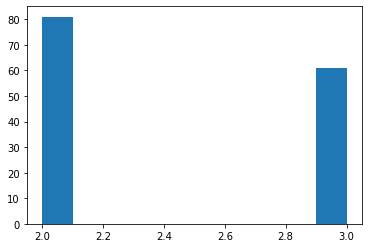

In [11]:
plt.hist(data['classe'])

# Divisão dos atributos de entrada e saída

In [12]:
entrada = data[['linfaticos', 'bloco_affere','bloco_linf_c','bloco_linf_s','bypass',
            'extravasados'	,'regeneracao'	,'absorcao_precoce'	,'linfonodos_reduzido',
            'linfonodos_aumentados'	,'mudancas_linfonodos'	,'defeitos_nodulos',
            'mudancas_nodulos','mudancas_estruturas'	,'formas_especiais',
            'deslocamento','exclusao_nodulos','qtd_nodulos']]
saida = data['classe']

# Exploração dos Dados através de Medidas de Localidade

Para atributos qualitativos serão utilizadas as seguintes medidas:
 * Moda
 * Quartis (25%, 50%, 75%)

Para os quantitativos, além dos supracitados, também serão utilizadas:
* Média
* Mediana

In [ ]:
entrada.mode()

,linfaticos,bloco_affere,bloco_linf_c,bloco_linf_s,bypass,extravasados,regeneracao,absorcao_precoce,linfonodos_reduzido,linfonodos_aumentados,mudancas_linfonodos,defeitos_nodulos,mudancas_nodulos,mudancas_estruturas,formas_especiais,deslocamento,exclusao_nodulos,qtd_nodulos
0,2,2,1,1,1,1,1,2,1,2,2,4,3,8,3,2,2,1


In [ ]:
entrada.quantile(0.25)

linfaticos               2.0
bloco_affere             1.0
bloco_linf_c             1.0
bloco_linf_s             1.0
bypass                   1.0
extravasados             1.0
regeneracao              1.0
absorcao_precoce         1.0
linfonodos_reduzido      1.0
linfonodos_aumentados    2.0
mudancas_linfonodos      2.0
defeitos_nodulos         2.0
mudancas_nodulos         2.0
mudancas_estruturas      4.0
formas_especiais         2.0
deslocamento             1.0
exclusao_nodulos         2.0
qtd_nodulos              1.0
Name: 0.25, dtype: float64

In [ ]:
entrada.quantile(0.5)

linfaticos               3.0
bloco_affere             2.0
bloco_linf_c             1.0
bloco_linf_s             1.0
bypass                   1.0
extravasados             1.0
regeneracao              1.0
absorcao_precoce         2.0
linfonodos_reduzido      1.0
linfonodos_aumentados    2.0
mudancas_linfonodos      2.0
defeitos_nodulos         3.0
mudancas_nodulos         3.0
mudancas_estruturas      5.0
formas_especiais         3.0
deslocamento             2.0
exclusao_nodulos         2.0
qtd_nodulos              2.0
Name: 0.5, dtype: float64

In [ ]:
entrada.quantile(0.75)

linfaticos               3.0
bloco_affere             2.0
bloco_linf_c             1.0
bloco_linf_s             1.0
bypass                   1.0
extravasados             2.0
regeneracao              1.0
absorcao_precoce         2.0
linfonodos_reduzido      1.0
linfonodos_aumentados    3.0
mudancas_linfonodos      3.0
defeitos_nodulos         4.0
mudancas_nodulos         3.0
mudancas_estruturas      8.0
formas_especiais         3.0
deslocamento             2.0
exclusao_nodulos         2.0
qtd_nodulos              3.0
Name: 0.75, dtype: float64

Dados Quantitativos:

In [ ]:
entrada[['linfonodos_reduzido','linfonodos_aumentados', 'qtd_nodulos']].mean()

linfonodos_reduzido      1.014085
linfonodos_aumentados    2.521127
qtd_nodulos              2.535211
dtype: float64

In [ ]:
entrada[['linfonodos_reduzido','linfonodos_aumentados', 'qtd_nodulos']].median()

linfonodos_reduzido      1.0
linfonodos_aumentados    2.0
qtd_nodulos              2.0
dtype: float64

# Exploração dos Dados através de Medidas de Distribuição

### Histogramas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


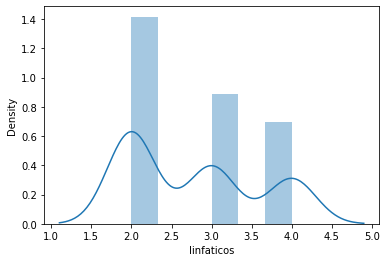

In [ ]:
sns.distplot(entrada['linfaticos'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


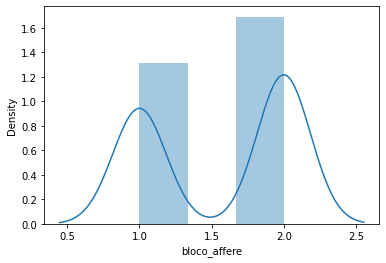

In [ ]:
sns.distplot(entrada['bloco_affere'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


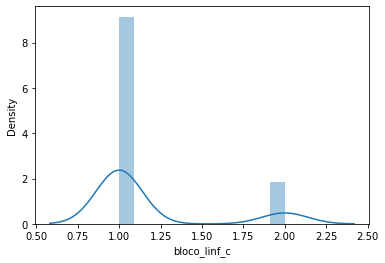

In [ ]:
sns.distplot(entrada['bloco_linf_c'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


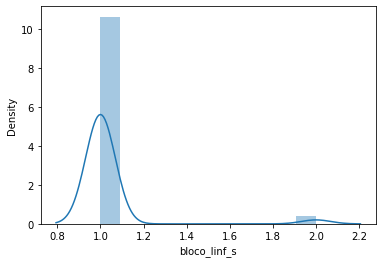

In [ ]:
sns.distplot(entrada['bloco_linf_s'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


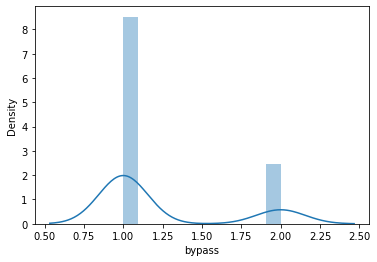

In [ ]:
sns.distplot(entrada['bypass'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


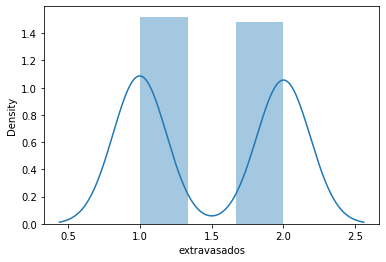

In [ ]:
sns.distplot(entrada['extravasados'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


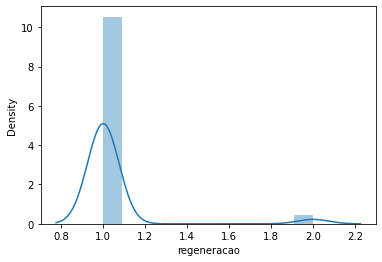

In [ ]:
sns.distplot(entrada['regeneracao'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


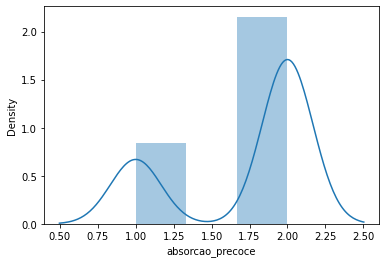

In [ ]:
sns.distplot(entrada['absorcao_precoce'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


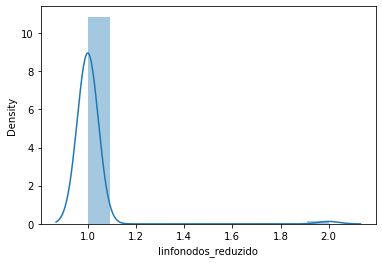

In [ ]:
sns.distplot(entrada['linfonodos_reduzido'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


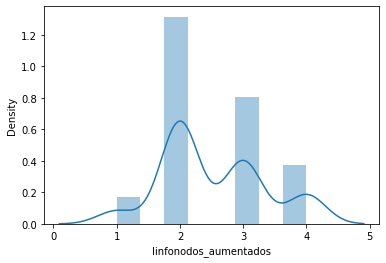

In [ ]:
sns.distplot(entrada['linfonodos_aumentados'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


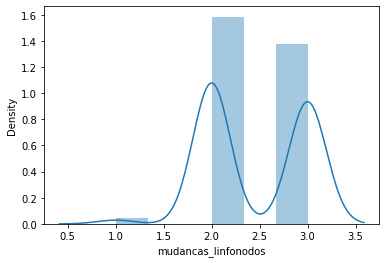

In [ ]:
sns.distplot(entrada['mudancas_linfonodos'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


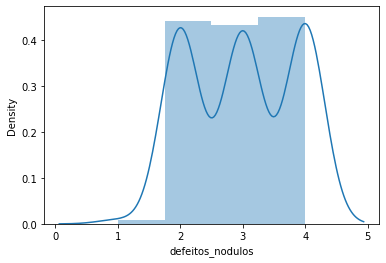

In [ ]:
sns.distplot(entrada['defeitos_nodulos'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


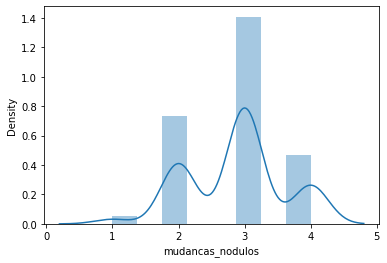

In [ ]:
sns.distplot(entrada['mudancas_nodulos'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


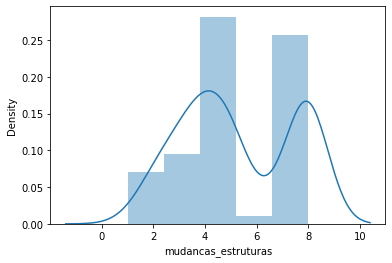

In [ ]:
sns.distplot(entrada['mudancas_estruturas'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


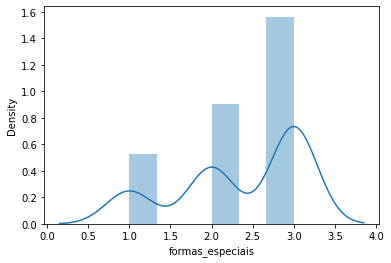

In [ ]:
sns.distplot(entrada['formas_especiais'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


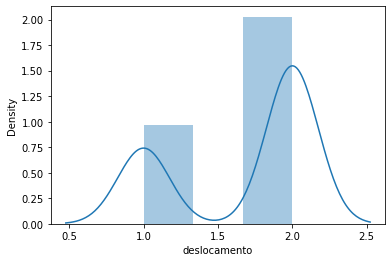

In [ ]:
sns.distplot(entrada['deslocamento'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


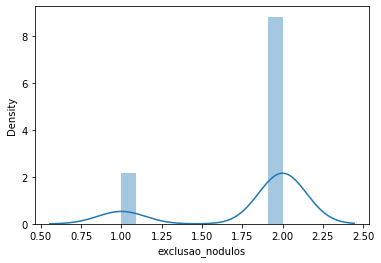

In [ ]:
sns.distplot(entrada['exclusao_nodulos'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


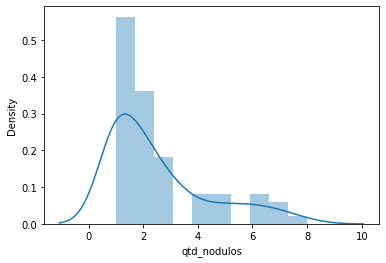

In [ ]:
sns.distplot(entrada['qtd_nodulos'])

In [ ]:
entrada.mode()

,linfaticos,bloco_affere,bloco_linf_c,bloco_linf_s,bypass,extravasados,regeneracao,absorcao_precoce,linfonodos_reduzido,linfonodos_aumentados,mudancas_linfonodos,defeitos_nodulos,mudancas_nodulos,mudancas_estruturas,formas_especiais,deslocamento,exclusao_nodulos,qtd_nodulos
0,2,2,1,1,1,1,1,2,1,2,2,4,3,8,3,2,2,1


# Exploração dos Dados através de Medidas de Dispersão

Serão utilizadas as seguintes medidas:

* Variância
* Devio Padrão
* Boxplot

In [ ]:
np.var(entrada[['linfonodos_reduzido','linfonodos_aumentados', 'qtd_nodulos']])

linfonodos_reduzido      0.013886
linfonodos_aumentados    0.658004
qtd_nodulos              3.431859
dtype: float64

In [ ]:
np.std(entrada[['linfonodos_reduzido','linfonodos_aumentados', 'qtd_nodulos']])

linfonodos_reduzido      0.117839
linfonodos_aumentados    0.811175
qtd_nodulos              1.852528
dtype: float64

### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


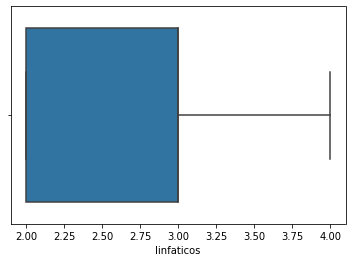

In [ ]:
sns.boxplot(entrada['linfaticos']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


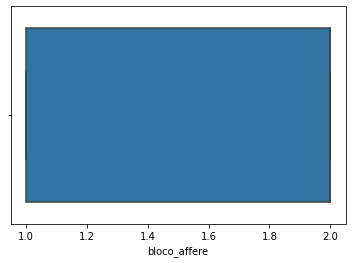

In [ ]:
sns.boxplot(entrada['bloco_affere'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


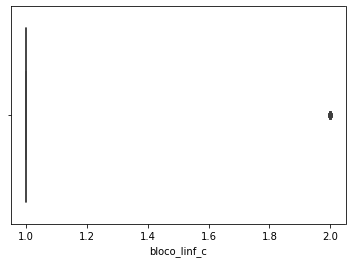

In [ ]:
sns.boxplot(entrada['bloco_linf_c'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


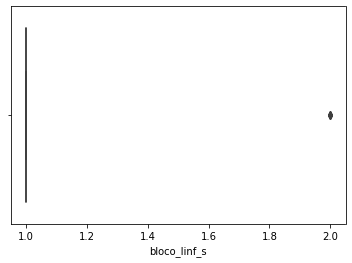

In [ ]:
sns.boxplot(entrada['bloco_linf_s'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


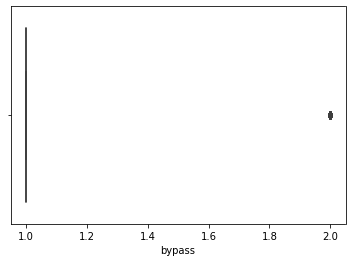

In [ ]:
sns.boxplot(entrada['bypass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


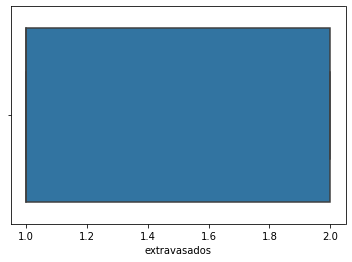

In [ ]:
sns.boxplot(entrada['extravasados'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


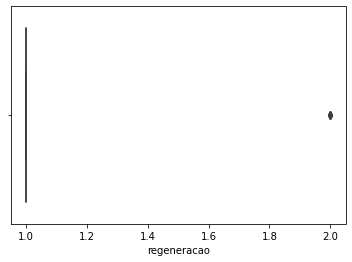

In [ ]:
sns.boxplot(entrada['regeneracao'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


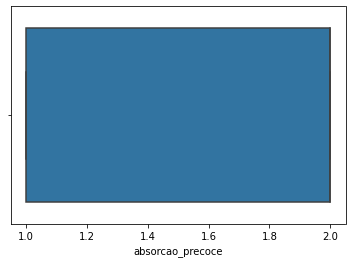

In [ ]:
sns.boxplot(entrada['absorcao_precoce'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


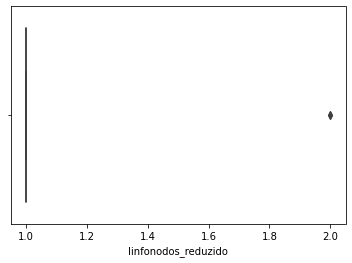

In [323]:
sns.boxplot(entrada['linfonodos_reduzido'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


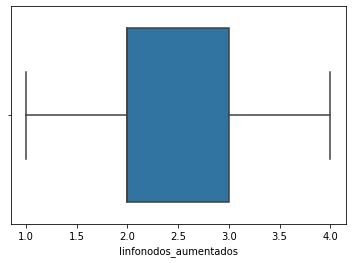

In [ ]:
sns.boxplot(entrada['linfonodos_aumentados'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


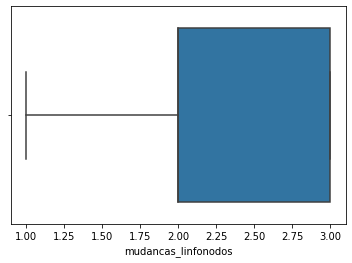

In [ ]:
sns.boxplot(entrada['mudancas_linfonodos'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


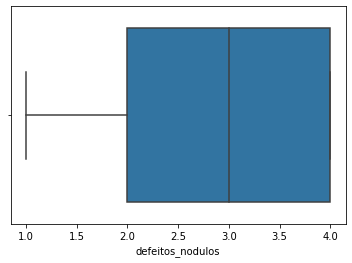

In [ ]:
sns.boxplot(entrada['defeitos_nodulos'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


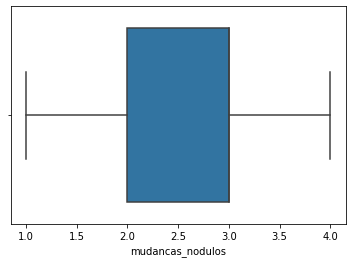

In [ ]:
sns.boxplot(entrada['mudancas_nodulos'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


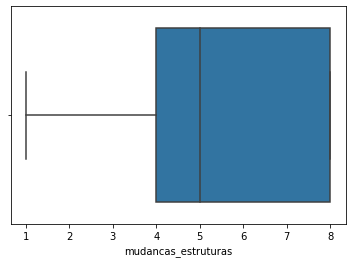

In [ ]:
sns.boxplot(entrada['mudancas_estruturas'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


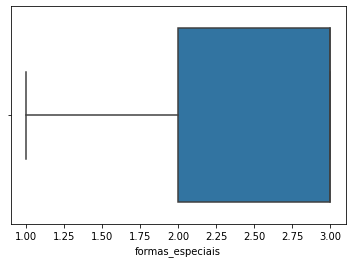

In [ ]:
sns.boxplot(entrada['formas_especiais'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


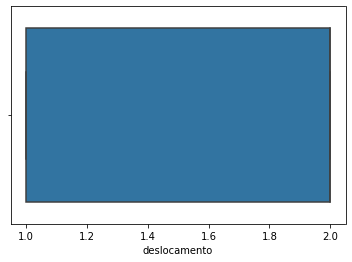

In [ ]:
sns.boxplot(entrada['deslocamento'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


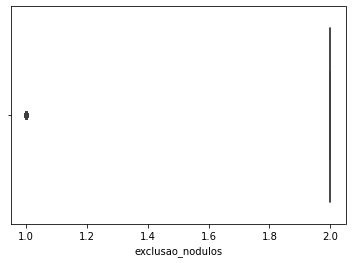

In [ ]:
sns.boxplot(entrada['exclusao_nodulos'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


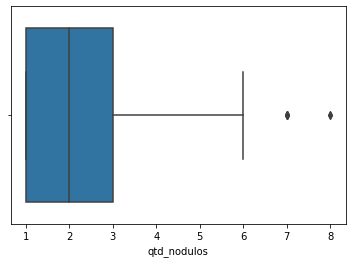

In [ ]:
sns.boxplot(entrada['qtd_nodulos'])

# Definição de treino e teste

#### Definindo conjunto de treino

Para os casos de teste serão selecionados 70% de cada classe, desta forma teremos: 
* Classe 2: 56
* Classe 3: 42

Na linha seguinte, fiz um filtro igual ao utilizado para excluir dados solicitados.

In [13]:
filtro3 = data[data['classe'] == 2].index
filtro4 = data[data['classe'] == 3].index

Importação da biblioteca necessária para buscar dados aleatórios na base e criação de novos dataframes

In [14]:
import random

classe2 = data.loc[filtro3] #somente dados de classe 2
classe3 = data.loc[filtro4] #somente dados de classe 3

Selecionando dados aleatórios de dentro do dataset que contém apenas itens de classe 2

In [15]:
treino_c2 = classe2.sample(56)

Para confirmar se ocorreu bem:

In [16]:
treino_c2['classe'].value_counts()

2    56
Name: classe, dtype: int64

Repetindo para a classe 3

In [17]:
treino_c3 = classe3.sample(42)

Confirmando se ocorreu bem:

In [18]:
treino_c3['classe'].value_counts()

3    42
Name: classe, dtype: int64

Concatenando em um único dataframe:

In [19]:
treino = pd.concat([treino_c3, treino_c2])
treino.shape

(98, 19)

Retirando o atributo de saída e armazenando em `treino_y`. Os atributos de entrada serão armazenados em `treino_x`

In [20]:
treino_x = treino.loc[:, treino.columns != 'classe']
treino_y = treino['classe']

treino_x.shape

(98, 18)

#### Definindo conjunto de teste

Para os casos de teste, serão selecionados 30% de cada classe. Assim, pegaremos 18 dados da classe 2; e 16 da classe 3.
Utilizei método semelhante à exclusão das duas classes anteriores: através do método `drop`, retirei da base original as entradas já selecionadas para o conjunto de treinamento

In [21]:
teste = data.drop(treino.index)
teste.shape

(44, 19)

Verificando se obtive sucesso

In [22]:
teste['classe'].value_counts()

2    25
3    19
Name: classe, dtype: int64

Novamente removendo o atributo de saída `teste_y`

In [23]:
teste_x = teste.loc[:, teste.columns != 'classe']
teste_y = teste['classe']

# Redução de Dimensionalidade com PCA

Para esta base de dados, todos os atributos são importantes, tendo em vista que seu objetivo é o diagnóstico do tipo de câncer do paciente. Entretanto, para fins didáticos, ferei a redução

In [24]:
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

pca = decomposition.PCA(n_components=5)
treino_x = pca.fit_transform(treino_x)
teste_x = pca.transform(teste_x)

In [25]:
np.round(pca.explained_variance_ratio_,2)

array([0.41, 0.28, 0.07, 0.05, 0.03])

Com 5 componentes conseguimos explicar cerca de 81% dos dados.

In [26]:
treino_df = pd.DataFrame(data = treino_x,
                       columns = ['Principal Componente 1', 'Principal Componente 2',
                                  'Principal Componente 3', 'Principal Componente 4',
                                  'Principal Componente 5'])

In [27]:
treino_df

,Principal Componente 1,Principal Componente 2,Principal Componente 3,Principal Componente 4,Principal Componente 5
0,1.572665,-2.316329,0.886401,0.564871,-0.604042
1,0.482075,2.741649,0.148930,-1.016665,0.001373
2,-3.056751,-0.258704,0.833083,-0.168163,-0.520994
3,4.742598,2.097332,3.265238,0.921111,0.252955
4,-1.327513,0.348292,0.487269,-0.337779,-0.683880
...,...,...,...,...,...
93,1.343539,-2.836605,-0.713319,-1.069281,0.220508
94,-1.323527,0.457685,-0.654663,0.106846,-0.377815
95,1.408133,0.716550,0.604993,-0.614444,-0.510506
96,-1.318530,-1.172459,-0.337306,0.350711,-0.136574


In [28]:
teste_x.shape

(44, 5)

In [29]:
teste_df = pd.DataFrame(data = teste_x,
                       columns = ['Principal Componente 1', 'Principal Componente 2',
                                  'Principal Componente 3', 'Principal Componente 4',
                                  'Principal Componente 5'])

In [30]:
teste_df

,Principal Componente 1,Principal Componente 2,Principal Componente 3,Principal Componente 4,Principal Componente 5
0,-1.447845,0.471363,-0.159853,0.636695,-0.606605
1,3.402017,0.118370,1.780920,0.013785,-0.496805
2,-0.689171,-0.512065,0.570482,-0.487418,-0.372890
3,1.287381,-0.849229,-0.998099,1.682068,-0.239907
4,-0.587241,-0.283802,-0.172655,-0.703311,-0.774602
5,-0.899572,-0.650256,0.921369,0.073295,-0.837364
6,-1.614811,-1.564026,1.095757,0.916541,0.285117
7,1.966442,-1.816615,-0.546387,0.293329,0.250735
8,-2.969268,-0.000563,0.025086,1.509065,0.291029
9,-1.141226,0.838010,-1.915515,0.273710,0.353846
